 Heart Failure Clinical Records Dataset

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
df.shape

(299, 13)

In [5]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

1. What is the distribution of age among heart failure patients in the dataset.

In [6]:
age=df.age

In [7]:
age

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

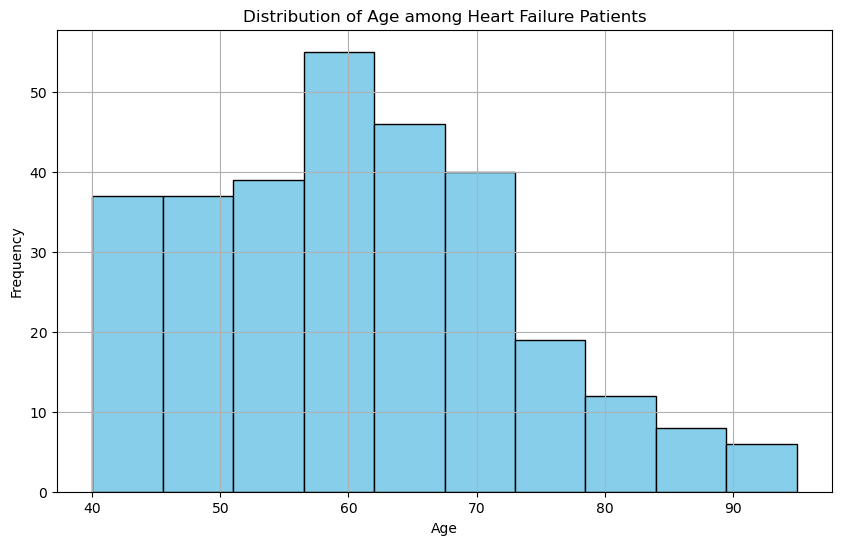

In [8]:
plt.figure(figsize=(10,6))
plt.hist(age, color='skyblue', edgecolor='black')
plt.title('Distribution of Age among Heart Failure Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

 2.How does the death rate vary with age?

In [9]:
death_rate_with_age=df.groupby('age')['DEATH_EVENT'].mean()

In [10]:
death_rate_with_age

age
40.000    0.000000
41.000    0.000000
42.000    0.142857
43.000    0.000000
44.000    0.000000
45.000    0.315789
46.000    0.333333
47.000    0.000000
48.000    1.000000
49.000    0.250000
50.000    0.296296
51.000    0.250000
52.000    0.000000
53.000    0.100000
54.000    0.500000
55.000    0.176471
56.000    0.000000
57.000    0.500000
58.000    0.200000
59.000    0.750000
60.000    0.393939
60.667    0.500000
61.000    0.000000
62.000    0.200000
63.000    0.000000
64.000    0.000000
65.000    0.307692
66.000    0.000000
67.000    0.000000
68.000    0.400000
69.000    0.666667
70.000    0.280000
72.000    0.714286
73.000    0.250000
75.000    0.545455
77.000    0.500000
78.000    0.000000
79.000    0.000000
80.000    0.714286
81.000    0.000000
82.000    1.000000
85.000    0.500000
86.000    1.000000
87.000    1.000000
90.000    0.666667
94.000    1.000000
95.000    1.000000
Name: DEATH_EVENT, dtype: float64

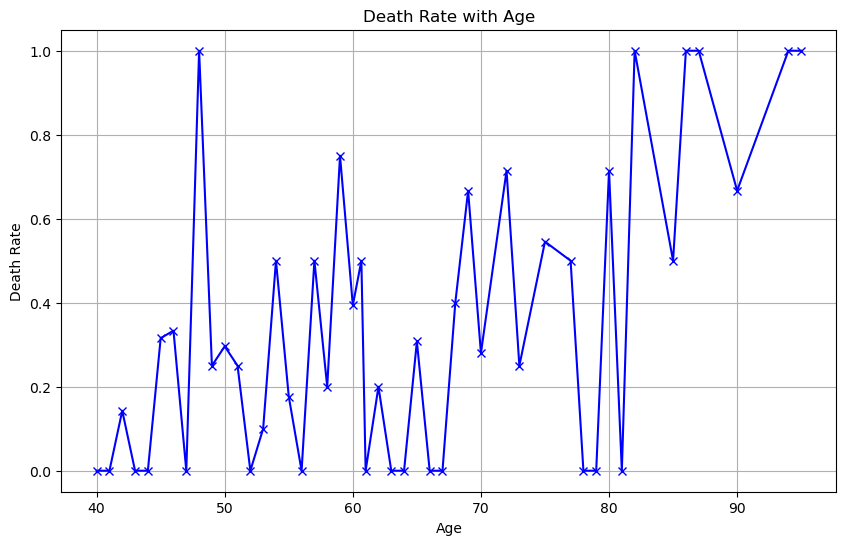

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(death_rate_with_age.index, death_rate_with_age.values, marker='x',color='b', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Death Rate')
plt.title('Death Rate with Age')
plt.grid(True)
plt.show()

3.What is the percentage of male and female patients in the dataset?

In [12]:
df.sex

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

In [13]:
df.sex.unique()

array([1, 0], dtype=int64)

In [14]:
gender_count=df['sex'].value_counts()

In [15]:
gender_count

1    194
0    105
Name: sex, dtype: int64

In [16]:
total_patients = len(df)
male_percentage = (gender_count[0] / total_patients) * 100
female_percentage = (gender_count[1] / total_patients) * 100

In [17]:
print("Percentage of male patients: {:.2f}%".format(male_percentage))
print("Percentage of female patients: {:.2f}%".format(female_percentage))

Percentage of male patients: 35.12%
Percentage of female patients: 64.88%


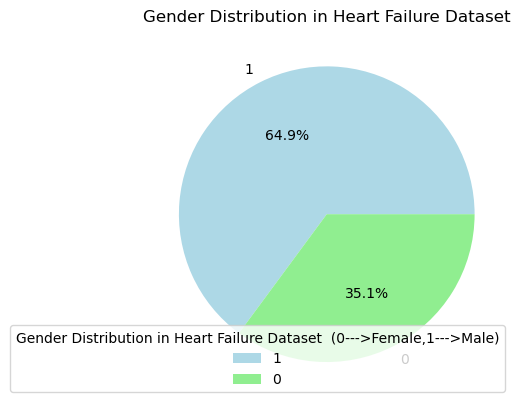

In [18]:
plt.pie(gender_count, labels = gender_count.index, autopct = '%1.1f%%', colors = ['lightblue', 'lightgreen'])
plt.title('Gender Distribution in Heart Failure Dataset')
plt.legend(title='Gender Distribution in Heart Failure Dataset  (0--->Female,1--->Male)',loc='lower right')
plt.show()

4.How does the platelet count vary among different age groups?

In [19]:
platelet_count_by_age = df.groupby('age')['platelets'].mean()

In [20]:
platelet_count_by_age

age
40.000    262428.571429
41.000    374000.000000
42.000    244051.147143
43.000    237000.000000
44.000    249179.015000
45.000    331300.845263
46.000    294119.343333
47.000    130000.000000
48.000    165500.000000
49.000    286500.000000
50.000    257939.186296
51.000    290339.507500
52.000    307200.000000
53.000    291135.803000
54.000    207500.000000
55.000    272239.652353
56.000    133000.000000
57.000    288000.000000
58.000    245000.000000
59.000    238750.000000
60.000    249536.850303
60.667    295000.000000
61.000    231250.000000
62.000    231200.000000
63.000    255125.000000
64.000    265666.666667
65.000    257387.465000
66.000    202000.000000
67.000    239179.015000
68.000    247800.000000
69.000    199666.666667
70.000    258858.321200
72.000    316285.714286
73.000    211589.507500
75.000    254097.644545
77.000    314500.000000
78.000    379000.000000
79.000    172000.000000
80.000    233051.147143
81.000    231000.000000
82.000    189333.333333
85.000    30

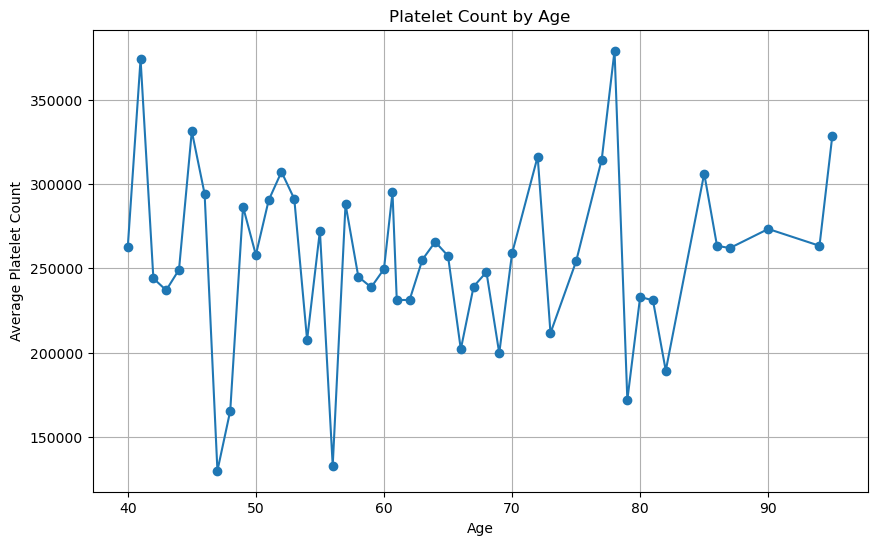

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(platelet_count_by_age.index, platelet_count_by_age.values, marker='o', linestyle='-')
plt.xlabel('Age')
plt.ylabel('Average Platelet Count')
plt.title('Platelet Count by Age')
plt.grid(True)
plt.show()

5.Is there a correlation between creatinine and sodium levels in the blood?

In [22]:
creatinine_levels = df['creatinine_phosphokinase']
sodium_levels = df['serum_sodium']

In [24]:
correlation = creatinine_levels.corr(sodium_levels)
print(f'The correlation between creatinine and sodium levels is: {correlation}')

The correlation between creatinine and sodium levels is: 0.05955015583372577


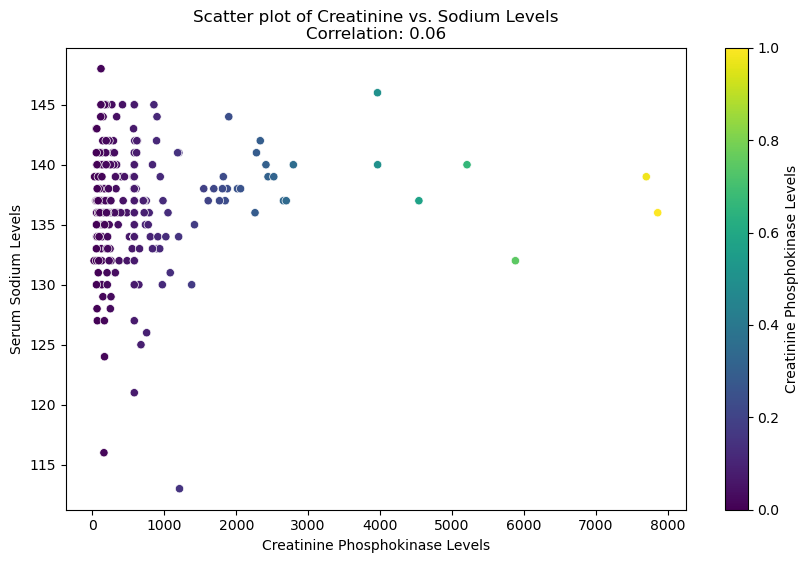

In [39]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=creatinine_levels, y=sodium_levels, hue=creatinine_levels, palette='viridis', legend=None)
plt.title(f'Scatter plot of Creatinine vs. Sodium Levels\nCorrelation: {correlation:.2f}')
plt.xlabel('Creatinine Phosphokinase Levels')
plt.ylabel('Serum Sodium Levels')
plt.colorbar(scatter.collections[0], label='Creatinine Phosphokinase Levels')
plt.show()

6.How does the prevalence of high blood pressure differ between male and female patients?

In [40]:
df['sex'] = df['sex'].map({1: 'Male', 0: 'Female'})

high_blood_pressure_counts = df.groupby(['sex', 'high_blood_pressure']).size().unstack(fill_value=0)
high_blood_pressure_prevalence = high_blood_pressure_counts.div(high_blood_pressure_counts.sum(axis=1), axis=0)



<Figure size 1000x600 with 0 Axes>

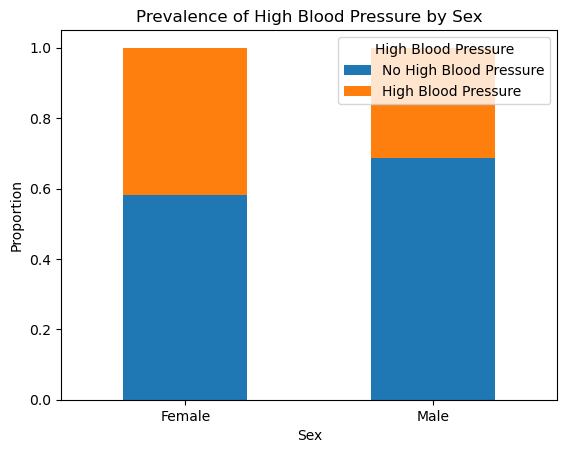

In [43]:
plt.figure(figsize=(10, 6))
high_blood_pressure_prevalence.plot(kind='bar', stacked=True)
plt.title('Prevalence of High Blood Pressure by Sex')
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.legend(['No High Blood Pressure', 'High Blood Pressure'], title='High Blood Pressure')
plt.xticks(rotation=0)
plt.show()

7.What is the relationship between smoking habits and the occurrencs of heart failure?

In [55]:
#df['smoking'] = df['smoking'].map({1: 'Smoker', 0: 'Non-Smoker'})
#df['heart_failure'] = df['DEATH_EVENT']

heart_failure_counts = df.groupby(['smoking', 'DEATH_EVENT']).size().unstack(fill_value=0)
heart_failure_prevalence = heart_failure_counts.div(heart_failure_counts.sum(axis=1), axis=0)


In [56]:
heart_failure_counts

DEATH_EVENT
smoking


In [57]:
plt.figure(figsize=(10, 6))
heart_failure_prevalence.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Prevalence of Heart Failure by Smoking Habits')
plt.xlabel('Smoking Habits')
plt.ylabel('Proportion')
plt.legend(['No Heart Failure', 'Heart Failure'], title='Heart Failure')
plt.xticks(rotation=0)
plt.show()

TypeError: no numeric data to plot

<Figure size 1000x600 with 0 Axes>

8.Are there any noticeable patterns in the distribution of death events across different age groups?

In [58]:
# Define age groups
bins = [0, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


In [60]:
death_event_counts = df.groupby(['age_group', 'DEATH_EVENT']).size().unstack(fill_value=0)
death_event_prevalence = death_event_counts.div(death_event_counts.sum(axis=1), axis=0)

<Figure size 1200x800 with 0 Axes>

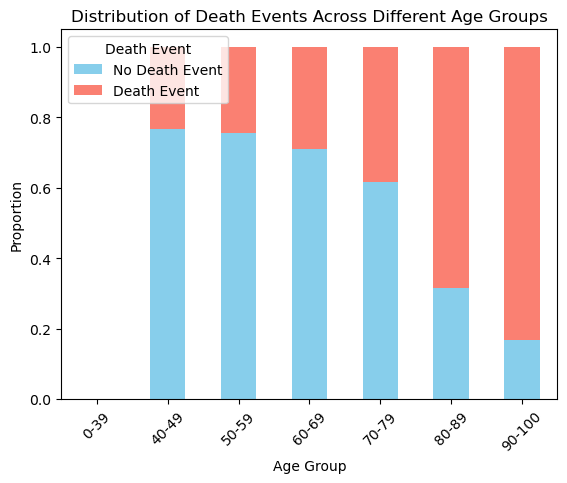

In [61]:
plt.figure(figsize=(12, 8))
death_event_prevalence.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('Distribution of Death Events Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(['No Death Event', 'Death Event'], title='Death Event')
plt.xticks(rotation=45)
plt.show()

9.Is there any significant difference in ejection fraction between patients with and without diabetes?

T-statistic: -0.08358970647234736
P-value: 0.9334389630426103


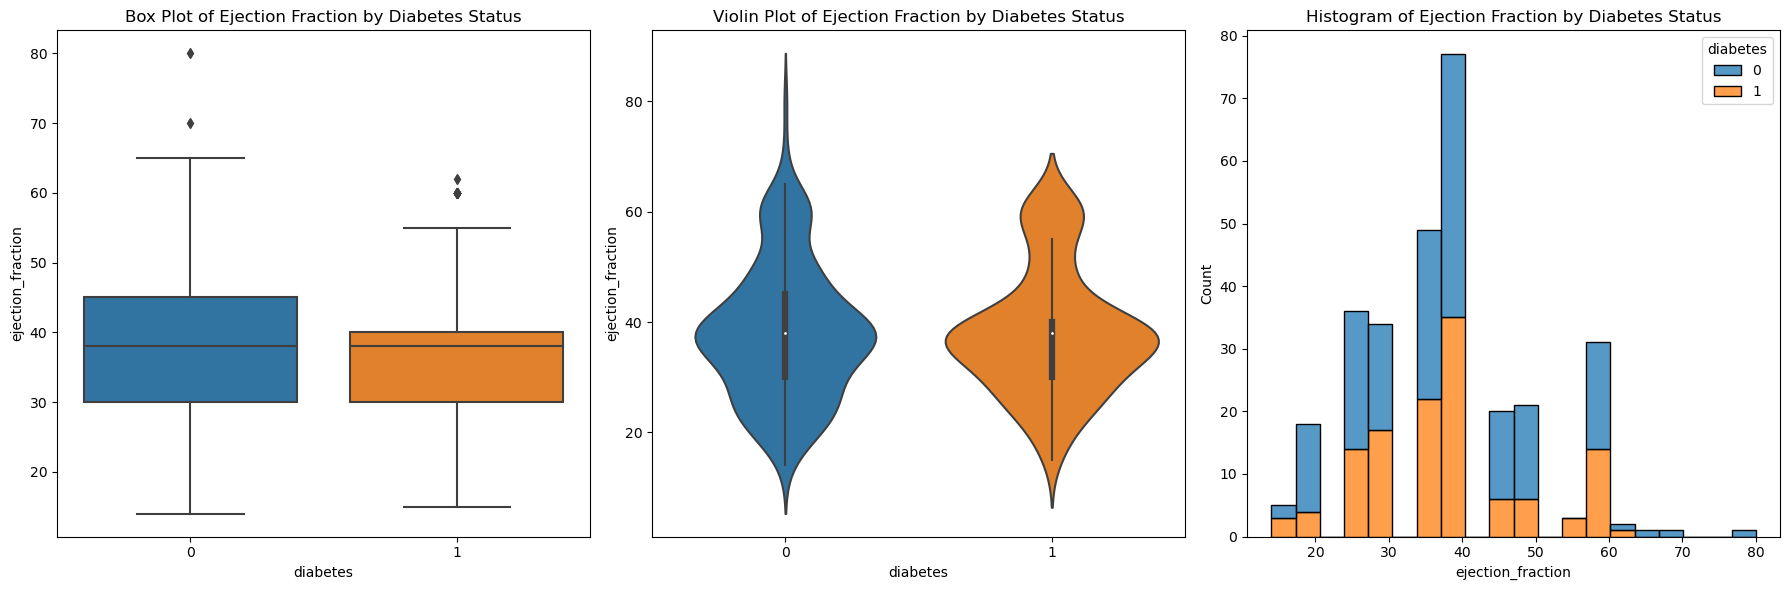

There is no significant difference in ejection fraction between patients with and without diabetes.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Preprocess the data
df.dropna(subset=['ejection_fraction', 'diabetes'], inplace=True)  # Remove rows with missing values in relevant columns

# Extract ejection fraction values for patients with and without diabetes
ejection_fraction_with_diabetes = df[df['diabetes'] == 1]['ejection_fraction']
ejection_fraction_without_diabetes = df[df['diabetes'] == 0]['ejection_fraction']

# Perform a t-test to compare the means
t_stat, p_value = stats.ttest_ind(ejection_fraction_with_diabetes, ejection_fraction_without_diabetes)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Create a figure with subplots
plt.figure(figsize=(18, 6))

# Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(x='diabetes', y='ejection_fraction', data=df)
plt.title('Box Plot of Ejection Fraction by Diabetes Status')

# Violin Plot
plt.subplot(1, 3, 2)
sns.violinplot(x='diabetes', y='ejection_fraction', data=df)
plt.title('Violin Plot of Ejection Fraction by Diabetes Status')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='ejection_fraction', hue='diabetes', multiple='stack', bins=20)
plt.title('Histogram of Ejection Fraction by Diabetes Status')

plt.tight_layout()
plt.show()

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in ejection fraction between patients with and without diabetes.")
else:
    print("There is no significant difference in ejection fraction between patients with and without diabetes.")

In [ ]:
10.How does the serum creatinine level vary between patients who survived and those who did not?

T-statistic: -5.306457599754319
P-value: 2.1901978548979685e-07


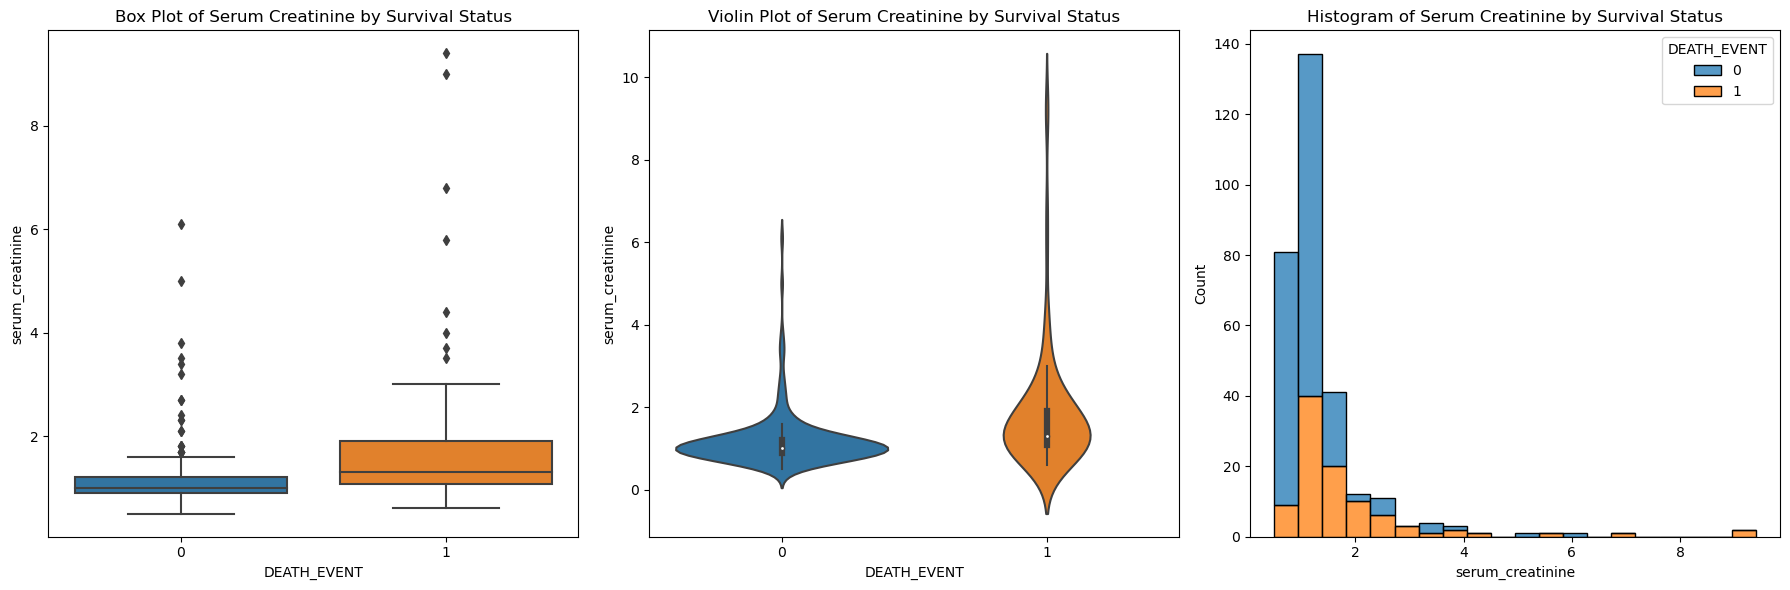

There is a significant difference in serum creatinine levels between survivors and non-survivors.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# Preprocess the data
df.dropna(subset=['serum_creatinine', 'DEATH_EVENT'], inplace=True)  # Remove rows with missing values in relevant columns

# Extract serum creatinine values for survivors and non-survivors
serum_creatinine_survivors = df[df['DEATH_EVENT'] == 0]['serum_creatinine']
serum_creatinine_non_survivors = df[df['DEATH_EVENT'] == 1]['serum_creatinine']

# Perform a t-test to compare the means
t_stat, p_value = stats.ttest_ind(serum_creatinine_survivors, serum_creatinine_non_survivors)

# Output the results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Create a figure with subplots
plt.figure(figsize=(18, 6))

# Box Plot
plt.subplot(1, 3, 1)
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Box Plot of Serum Creatinine by Survival Status')

# Violin Plot
plt.subplot(1, 3, 2)
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data=df)
plt.title('Violin Plot of Serum Creatinine by Survival Status')

# Histogram
plt.subplot(1, 3, 3)
sns.histplot(data=df, x='serum_creatinine', hue='DEATH_EVENT', multiple='stack', bins=20)
plt.title('Histogram of Serum Creatinine by Survival Status')

plt.tight_layout()
plt.show()

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in serum creatinine levels between survivors and non-survivors.")
else:
    print("There is no significant difference in serum creatinine levels between survivors and non-survivors.")